# Complete Statistical Data Analysis
## Guide

In [1]:
guide = "https://www.kaggle.com/code/shivanirana63/guide-to-complete-statistical-analysis"

Statistics helps answer questions like...
- What features are the most important?
- How should we design the experiment to develop our product strategy?
- What performance metrics should we measure?
- What is the most common and expected outcome?
- How do we differentiate between noise and valid data?

Topics:
1. Descriptive Statistics
2. Inferential Statistics
3. Visualizing Data Distribution

## Make necessary imports

In [1]:
import opendatasets as od
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt     # Use matplotlib>=3.6.3
import seaborn as sns

from scipy.stats import gmean
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

## Importing data
### Import data

In [2]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [3]:
file = 'body-performance-dataset/bodyPerformance.csv'
df = pd.read_csv(file)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

## 1. Descriptive Statistics
**Descriptive Statistics** - offers methods to summarise data by transforming raw observations into meaningful information that is easy to interpret and share in the form of numbers graph, bar plots, histogram, pie chart, etc. Descriptive statistics is simply a process to describe our existing data.

### 1.1 Measure of Central Tendency

#### 1.1.1 Mean
- The “Mean” is the average of the data.
- Average can be identified by summing up all the numbers and then dividing them by the number of observation.
- Mean = X1 + X2 + X3 +… + Xn / n

In [15]:
# Mean of all the columns in dataframe
numeric_data.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [16]:
# Mean of individual column of dataframe
df['body fat_%'].mean()

23.240164950869858

#### 1.1.2 Geometric Mean
- The Geometric Mean (GM) is the average value or mean which signifies the central tendency of the set of numbers by finding the product of their values.
- Basically, we multiply the 'n' values altogether and take out the nth root of the numbers, where n is the total number of values.
- - For example: for a given set of two numbers such as 8 and 1, the geometric mean is equal to √(8×1) = √8 = 2√2.
- Thus, the geometric mean is also defined as the nth root of the product of n numbers.
- In mathematics and statistics, measures of central tendencies describe the summary of whole data set values.

In [18]:
gmean(df['body fat_%'])

22.053450257160534

#### 1.1.3 Harmonic Mean
- The Harmonic Mean (HM) is defined as the reciprocal of the average of the reciprocals of the data values.
- It is based on all the observations, and it is rigidly defined.
- Harmonic mean gives less weightage to the large values and large weightage to the small values to balance the values correctly
- In general, the harmonic mean is used when there is a necessity to give greater weight to the smaller items.
- It is applied in the case of times and average rates.

In [19]:
statistics.harmonic_mean(df['body fat_%'])

20.766092233445065

#### 1.1.4 Mode
- Mode is frequently occurring data or elements.
- If an element occurs the highest number of times, it is the mode of that data.
- If no number in the data is repeated, then there is no mode for that data.
- There can be more than one mode in a dataset if two values have the same frequency and also the highest frequency.

In [20]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


#### 1.1.5 Median
- Median is the 50%th percentile of the data. It is exactly the center point of the data.
- Median represents the middle value for any group. It is the point at which half the data is more and half the data is less.
- - Median helps to represent a large number of data points with a single data point.

In [21]:
statistics.median(df['body fat_%'])

22.8

All values - body fat_%:

In [26]:
arithemtic_mean = df['body fat_%'].mean()
geometric_mean = gmean(df['body fat_%'])
harmonic_mean = statistics.harmonic_mean(df['body fat_%'])
mode = df["body fat_%"].mode().values[0]
median = statistics.median(df['body fat_%'])

print("Arithemtic Mean: ", arithemtic_mean)
print("Geometric Mean: ", geometric_mean)
print("Harmonic Mean: ", harmonic_mean)
print("Mode: ", mode)
print("Median: ", median)

Arithemtic Mean:  23.240164950869858
Geometric Mean:  22.053450257160534
Harmonic Mean:  20.766092233445065
Mode:  23.1
Median:  22.8


### 1.2 Measure of Variability/Dispersion

#### 1.2.1 Variance
- In statistics, the variance is a measure of how far individual (numeric) values in a dataset are from the mean or average value.
- The variance is often used to quantify spread or dispersion. Spread is a characteristic of a sample or population that describes how much variability there is in it.
- A **high variance** tells us that the values in our dataset are far from their mean. So, our data will have **high levels of variability**.
- On the other hand, a **low variance** tells us that the values are quite close to the mean. In this case, the data will have **low levels of variability**.

In [27]:
statistics.variance(df['body fat_%'])

52.66178600041373

In [28]:
statistics.variance(df['height_cm'])

71.00729348140636

#### 1.2.2 Standard Deviation
- Standard deviation is a measure of dispersement in statistics.
- “Dispersement” tells you how much your data is spread out.
- Specifically, it shows you how much your data is spread out around the mean or average

In [29]:
statistics.stdev(df['body fat_%'])

7.256844079929906

Difference between Variance & Standard Deviation:
- **Variance** is a method to find or obtain the measure between the variables that how are they different from one another, whereas **standard deviation** shows us how the data set or the variables differ from the mean or the average value from the data set.
- Variance helps to find the distribution of data in a population from a mean, and standard deviation also helps to know the distribution of data in population, but standard deviation gives more clarity about the deviation of data from a mean.

#### 1.2.3 Shape of Data
Symmetric:
- In the symmetric shape of the graph, the data is distributed the same on both sides.
- In symmetric data, the mean and median are located close together.
- The curve formed by this symmetric graph is called a normal curve.

Skewness:
- Skewness is the measure of the asymmetry of the distribution of data.
- The data is not symmetrical (i.e) it is skewed towards one side.
- Skewness is classified into two types.
- - Positive Skew
- - Negative Skew

Positively skewed:
- In a Positively skewed distribution, the data values are clustered around the left side of the distribution and the right side is longer.
- The mean and median will be greater than the mode in the positive skew.

Negatively skewed
- In a Negatively skewed distribution, the data values are clustered around the right side of the distribution and the left side is longer.
- The mean and median will be less than the mode.

In [31]:
numeric_data.skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

Density plots:

<Axes: ylabel='Density'>

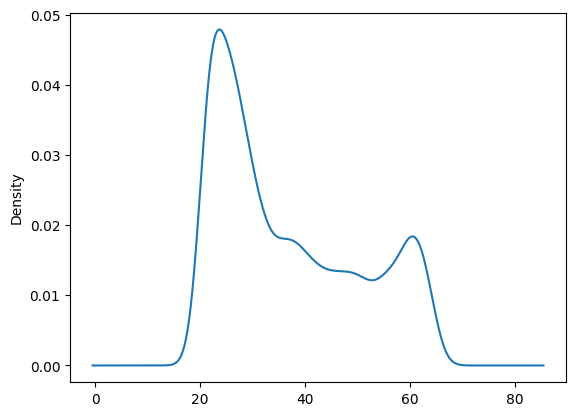

In [32]:
#Example of positive skewness
df['age'].plot(kind = 'density')

<Axes: ylabel='Density'>

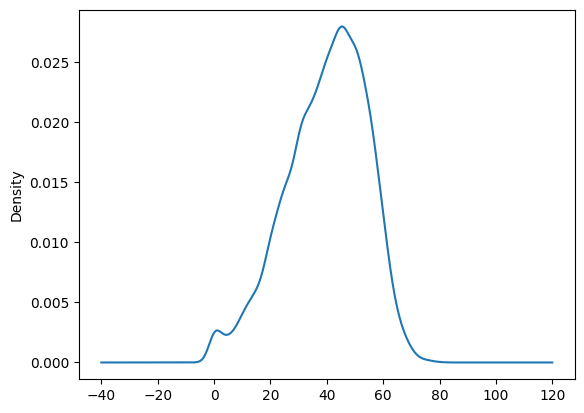

In [33]:
#Example of negative skewness
df['sit-ups counts'].plot(kind = 'density')

<Axes: xlabel='weight_kg', ylabel='Density'>

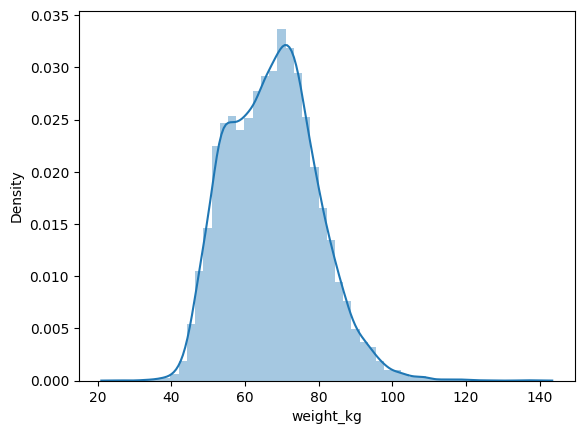

In [38]:
#Normal Distribution/Symmetric
sns.distplot(df['weight_kg'],hist=True,kde=True)

<Axes: ylabel='Density'>

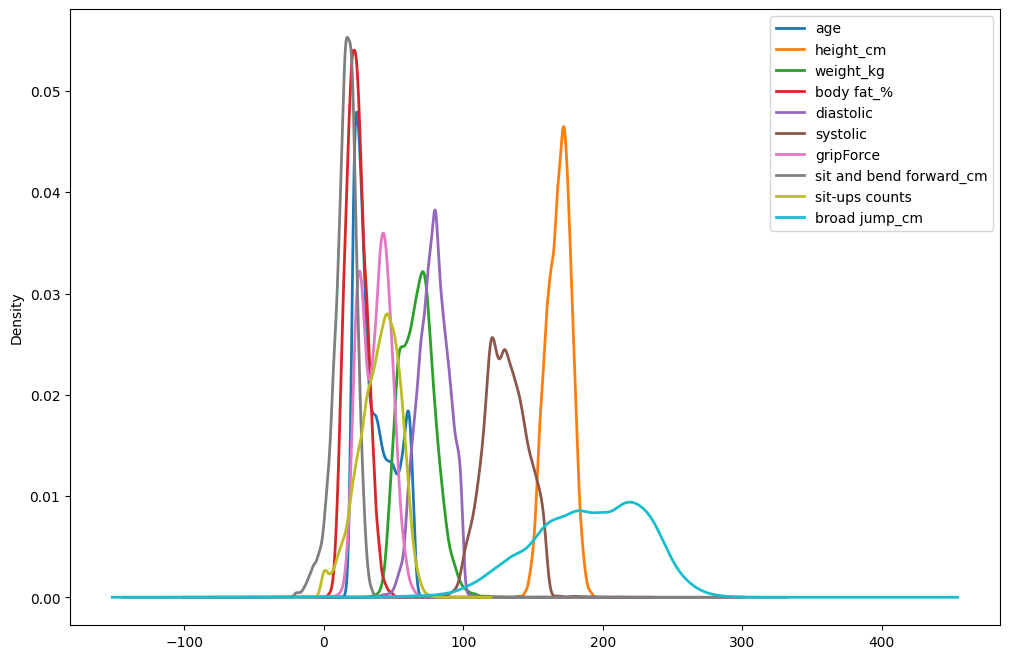

In [42]:
#Density of all features
df.plot.density(figsize = (12, 8),linewidth = 2)

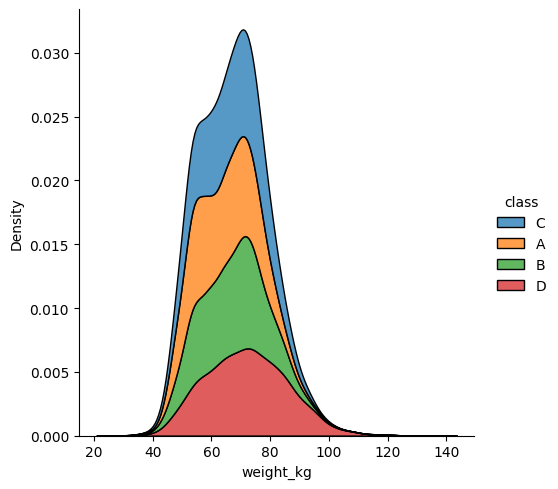

In [43]:
sns.displot(df, x="weight_kg", hue="class", kind="kde", multiple="stack")

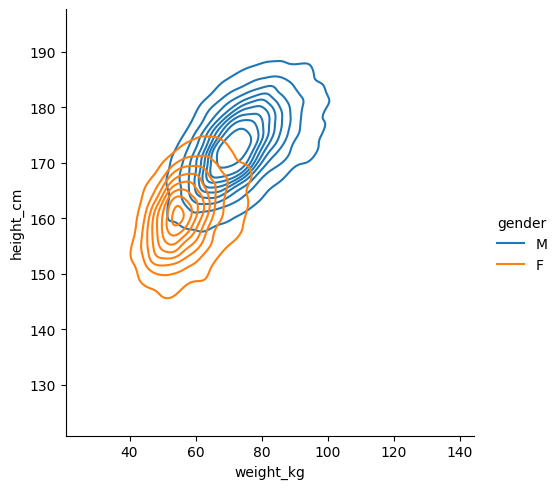

In [44]:
sns.displot(df, x="weight_kg", y="height_cm", hue="gender", kind="kde")

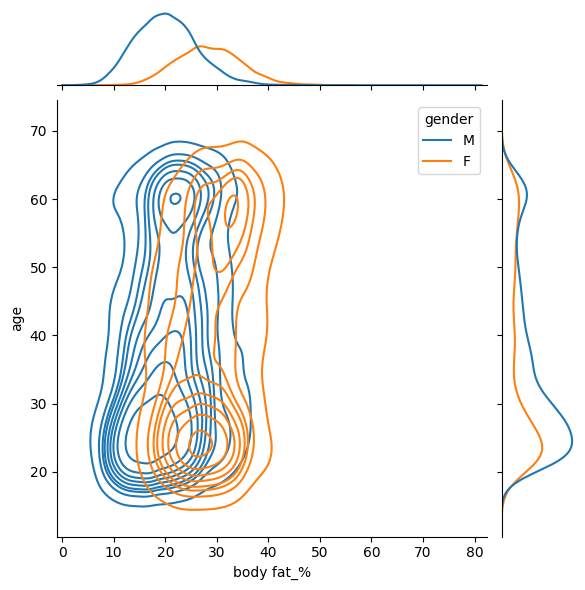

In [45]:
sns.jointplot(data=df, x="body fat_%", y="age", hue="gender",kind="kde")

Kurtosis:
- Kurtosis is the measure of describing the distribution of data.
- This data is distributed in different ways. They are:
- - Platykurtic
- - Mesokurtic
- - Leptokurtic

1. Platykurtic: The platykurtic shows a distribution with flat tails. Here the data is distributed faltly. The flat tails indicated the small outliers in the distribution.

2. Mesokurtic: In Mesokurtic, the data is widely distributed. It is normally distributed and it also matches normal distribution.

3. Leptokurtic: In leptokurtic, the data is very closely distributed. The height of the peak is greater than width of the peak

In [47]:
numeric_data.kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64

#### 1.2.4 Inter Quartile Range (IQR)
- The interquartile range tells you the spread of the middle half of your distribution.
- Quartiles segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.

How to calculate IQR?
- IQR = Q_3 - Q_1

In [48]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR)) 

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


In [49]:
#We can also find different percentiles of particular column
df['weight_kg'].quantile([0.1,0.2,0.4,0.5])

0.1    52.2
0.2    56.1
0.4    64.0
0.5    67.4
Name: weight_kg, dtype: float64

#### 1.2.5 Range
- The range of data is the difference between the maximum and minimum element in the dataset.

In [50]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [51]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of age : 43
range of height_cm : 68
range of weight_kg : 111
range of body fat_% : 75
range of diastolic : 156
range of systolic : 201
range of gripForce : 70
range of sit and bend forward_cm : 238
range of sit-ups counts : 80
range of broad jump_cm : 303


#### 1.2.6 Mean Absolute Deviation(MAD)
- The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.
- Mean absolute deviation helps us get a sense of how "spread out" the values in a data set are.

In [61]:
abs(numeric_data - numeric_data.mean()).mean()
# As we can see, 'broad jump_cm' feature has the highest variability in our data.

# df.mad() method is deprecated, found calculation above at: https://github.com/pandas-dev/pandas/issues/11787

age                        11.844362
height_cm                   6.919084
weight_kg                   9.680199
body fat_%                  5.833442
diastolic                   8.651310
systolic                   12.026424
gripForce                   9.068306
sit and bend forward_cm     6.268510
sit-ups counts             11.571289
broad jump_cm              32.726099
dtype: float64

## 2.Inferential Statistics
**Inferential Statistics** - offers methods to study experiments done on small samples of data and chalk out the inferences to the entire population (entire domain).

### 2.1 Population vs. Samples
- In statistics, the **population is a set of all elements or items that you’re interested in.** Populations are often vast, which makes them inappropriate for collecting and analyzing data. That’s why statisticians usually try to make some conclusions about a population by choosing and examining a representative subset of that population.

- This **subset of a population is called a sample.** Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

### 2.2 Data Sampling
Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined.

Two ways of sampling:
- Probability Sampling
- Non-probability Sampling

**Probability Sampling:** In probability sampling, every element of the population has an equal chance of being selected. Probability sampling gives us the best chance to create a sample that is truly representative of the population.
1. Simple Random.
2. Systematic.
3. Stratified.
4. Cluster.

**Non-Probability Sampling:** In non-probability sampling, all elements do not have an equal chance of being selected. Consequently, there is a significant risk of ending up with a non-representative sample which does not produce generalizable results.
1. Convenience.
2. Quota.
3. Judgement.
4. Snowball.

In [62]:
#random sampling in python
df.sample(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
4927,31.0,F,162.1,64.7,35.9,72.0,118.0,26.7,18.0,41.0,139.0,C
9166,33.0,M,178.0,71.5,21.6,75.0,119.0,41.8,14.2,66.0,211.0,B
8070,55.0,F,159.3,55.5,29.7,81.0,147.0,21.8,22.5,31.0,118.0,B
1551,54.0,M,163.7,69.4,24.5,83.0,123.0,39.9,14.0,30.0,180.0,C
9978,32.0,M,176.6,75.6,21.8,72.0,103.0,40.6,14.9,31.0,215.0,D


### 2.3 Central Limit Theorem
- The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger.
- The sample means will converge to a normal distribution regardless of the shape of the population. That is, the population can be positively or negatively skewed, normal or non-normal.
- CLT states that — as the sample size tends to infinity, the shape of the distribution resembles a bell shape (normal distribution). The center of this distribution of the sample means becomes very close to the population mean — which is essentially the law of large numbers.

*So, how is the Central Limit Theorem used?*
- It enables us to test the hypothesis of whether our sample represents a population distinct from the known population. We can take a mean from a sample and compare it with the sampling distribution to estimate the probability whether the sample comes from the known population.

### 2.4 Confidence Interval
- Confidence Interval is a type of estimate computed from the statistics of the observed data which gives a range of values that’s likely to contain a population parameter with a particular level of confidence.
- A confidence interval for the mean is a range of values between which the population mean possibly lies.

<Axes: xlabel='weight_kg', ylabel='height_cm'>

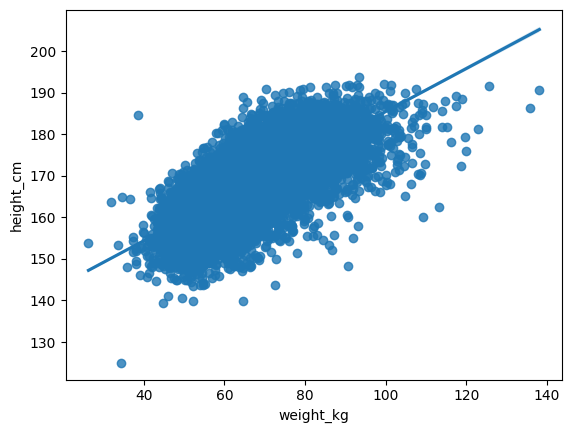

In [63]:
sns.regplot(data = df, x="weight_kg", y="height_cm", ci=95)

The larger the confidence level, the wider the confidence interval. For example, here’s how to calculate a 95% C.I. for the data:

In [64]:
#Method to calculate C.I
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [65]:
mean_confidence_interval(df['age'], confidence=0.95)

(36.77510639886508, 36.54432260771787, 37.00589019001228)

In [68]:
#In-built function to calculate C.I
sm.stats.DescrStatsW(df['age']).zconfint_mean()

(36.54434346585151, 37.00586933187864)

### 2.5 Hypothesis Testing
Hypothesis testing is a part of statistical analysis, where we test the assumptions made regarding a population parameter.

It is generally used when we were to compare:
1. A single group with an external standard
2. Two or more groups with each other

The two types of hypothesis testing are null hypothesis and alternate hypothesis.
1. Null hypothesis is the initial assumption about an event (also referred to as the ground truth).
2. Alternate hypothesis is an assumption that counters the initial assumption.

To carry out hypothesis testing, we will refer to the null hypothesis (initial assumption) as the H0 hypothesis and the alternate hypothesis (counter assumption) as the H1 hypothesis.

The follow-up action is to collect the available data samples to support the null hypothesis.

**We should collect data pertaining to the hypothesis and analyze it to decide if H0 can be accepted or rejected.**

While doing that, there is a likelihood of the following events happening:

- The ground truth (H0) is true, so H0 is accepted.
- The ground truth (H0) is not true, so H0 is rejected and H1 is accepted.

The above two cases are the desired possibilities. It’s either our null hypothesis was right and adopted or our null hypothesis was wrong and rejected.

The remaining possibilities are outlined below:

 1. Null hypothesis (H0) is true but we reject it.

 2. Null hypothesis (H0) is not true, but we did not reject it.

### 2.6 Z-score
- Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset.
- In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.
- If a z-score is equal to 0, it is on the mean. A positive z-score indicates the raw score is higher than the mean average.

In [72]:
z_scores = stats.zscore(numeric_data)
z_scores

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.717432,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009
1,-0.864220,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013
2,-0.423857,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005
3,-0.350463,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176
4,-0.644038,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...,...,...,...
13388,-0.864220,0.420138,0.364265,-0.970178,-0.446565,0.731658,-0.109547,0.259063,0.506353,0.197418
13389,-1.157795,1.322079,-0.296866,-1.535183,-0.446565,-0.151890,-0.373090,-1.668480,0.576400,-0.580177
13390,0.163293,1.025388,1.092346,-0.432734,-0.074183,0.119971,2.497643,0.140809,0.366259,0.975013
13391,1.998138,-2.665451,-0.815728,2.364730,-1.005140,-0.627647,-1.662566,-0.710621,-2.785848,-2.887878


### 2.7 P-Value
- A p-value explains the likelihood of an assumption being true based on the null hypothesis. It is an abbreviation for probability value.
- Technically, the only way we can accept or reject our null hypothesis is after determining our p-value.
- - **The smaller our p-value is, the more delicate it is to trust our null hypothesis.**
- The p-value is usually within the range of 0 and 1.

**Method 1: Left tailed or Lower tailed test:**
- In distribution, the lower tail includes the lowest values. Because the lowest values on a number line are on the left, the lowest group of numbers will always show on the left when graphing any distribution on a Coordinate plane. z- value is generally negative for the left tailed test.

**Method 2: Right tailed or upper tailed test**
- A right-tailed test or upper test is the inequality that is pointing to the right.

**Method 3: Two-tailed tests**
- In statistics, a two-tailed test is a procedure that uses a two-sided critical area of a distribution to determine if a sample is larger than or less than a given range of values.

In [73]:
p_values_1 = scipy.stats.norm.sf(abs(-0.717))#left-tailed
p_values_2 = scipy.stats.norm.sf(abs(z_scores)) #right-tailed
p_values_3 = scipy.stats.norm.sf(abs(z_scores))*2 #two-tailed

p_values_1, p_values_2, p_values_3

(0.23668704832971305,
 array([[0.23655375, 0.32856721, 0.2571522 , ..., 0.35296889, 0.0782471 ,
         0.25015292],
        [0.19373361, 0.33634264, 0.16484602, ..., 0.44868532, 0.17705837,
         0.16477687],
        [0.33583507, 0.09506216, 0.18858371, ..., 0.35215483, 0.25899514,
         0.40943255],
        ...,
        [0.43514372, 0.15259011, 0.1373405 , ..., 0.44401042, 0.35708585,
         0.16477687],
        [0.02285084, 0.00384425, 0.20732781, ..., 0.23865955, 0.0026694 ,
         0.00193925],
        [0.41930351, 0.29420486, 0.45511301, ..., 0.16879076, 0.21577557,
         0.39971354]]),
 array([[0.47310751, 0.65713442, 0.5143044 , ..., 0.70593779, 0.15649419,
         0.50030583],
        [0.38746721, 0.67268529, 0.32969203, ..., 0.89737064, 0.35411674,
         0.32955374],
        [0.67167014, 0.19012432, 0.37716742, ..., 0.70430965, 0.51799027,
         0.81886509],
        ...,
        [0.87028745, 0.30518023, 0.274681  , ..., 0.88802084, 0.71417171,
         0.3

In [74]:
#Example to understand easily:
scipy.stats.norm.sf(abs(0.65))

0.2578461108058647

The p-value is 0.2587. If we use a significance level of α = 0.05, we would fail to reject the null hypothesis of our hypothesis test because this p-value is not less than 0.05.

### 2.8 T-Tests
- A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [10]:
stats.ttest_ind(df['body fat_%'][df['gender'] == 'M'],
                df['body fat_%'][df['gender'] == 'F'])

TtestResult(statistic=-76.48742318447472, pvalue=0.0, df=13391.0)

### 2.9 ANOVA
ANOVA is a word coined from ‘Analysis of Variance’. It is a statistical concept that shows the differences between the means of more than two independent groups, using variance analysis on samples from those groups.

It is used for checking the contrast between three or more samples with one test. Especially when the categorical class has over two categories.

During ANOVA testing, the hypothesis is:
1. H0: When all samples’ means are the same.
2. H1: When one or more samples are very much different.

#### 2.9.1 One way ANOVA test
- This is employed to determine the effect of a variable on one or two other variables by comparing their means. Using the example we will check if **weight_kg**, has an effect on **body fat_%** and **sit-ups counts** using one-way ANOVA test.

In [7]:
class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit-ups counts'] 
print(f_oneway(class1, class2, class3))

# Since our p-value is 0, we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.
# This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.

F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


#### 2.9.2 Two way ANOVA test
- This is called when we are dealing with three or more variables, trying to compare their means with each other.

In [8]:
weight = df['weight_kg']
height = df['height_cm']
fat = df['body fat_%']
classes = df['class']

model = ols('weight ~ C(fat) ', data=numeric_data).fit()

print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df        F        PR(>F)
C(fat)    1.320194e+05    526.0  1.81387  1.015159e-25
Residual  1.780285e+06  12866.0      NaN           NaN


ANOVA using pingouin:

In [9]:
# Run the ANOVA using pingouin
aov = pg.anova(data=df, dv='weight_kg', between='class', detailed=True)
print(aov)

   Source            SS     DF            MS           F          p-unc  \
0   class  1.039553e+05      3  34651.766845  256.561377  6.702274e-162   
1  Within  1.808349e+06  13389    135.062289         NaN            NaN   

        np2  
0  0.054361  
1       NaN  


### 2.10 Chi-squared Test
- Chi-Square test is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data.
- The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them.
- The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.
- **A low value for chi-square means there is a high correlation between your two sets of data.**

In [10]:
# create contingency table
data_crosstab = pd.crosstab(df['gender'],
                            df['class'],
                           margins=True, margins_name="Total")
data_crosstab

class,A,B,C,D,Total
gender,,,,,
F,1484,1185,1112,1145,4926
M,1864,2162,2237,2204,8467
Total,3348,3347,3349,3349,13393


In [11]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['gender'].unique()
columns = df['class'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

The P-value approach:

In [12]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and p value is: 0.0
Null Hypothesis is rejected.


The critical value approach:

In [13]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


## 3. Visualizing Data Distribution

### 3.1 Boxplot

<Axes: >

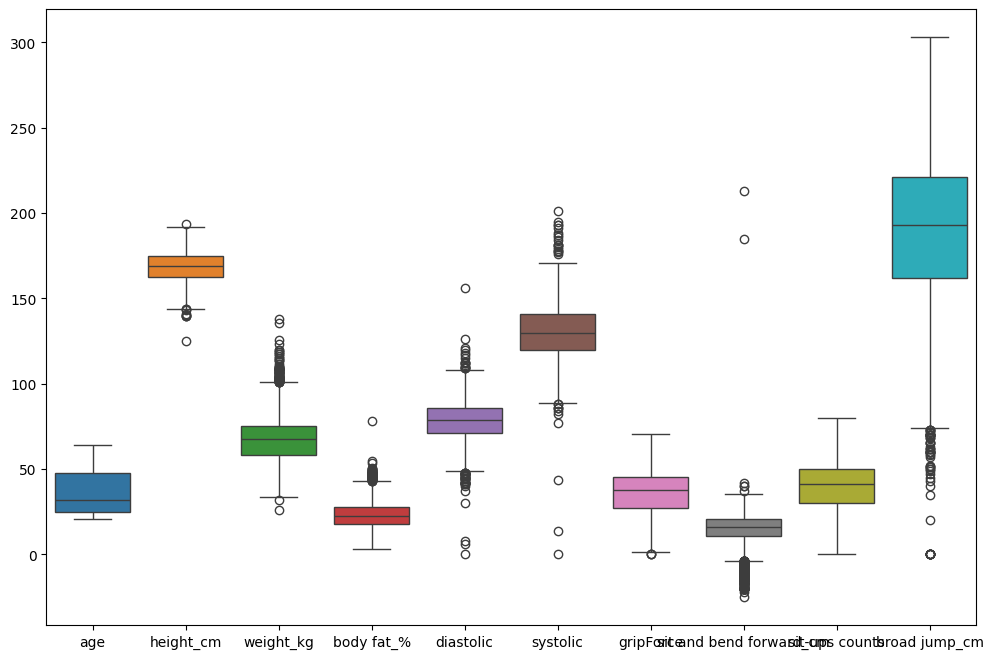

In [6]:
#Boxlot can plot outliers in data
plt.figure(figsize = (12, 8))
sns.boxplot(data = df)

#### 3.1.1 Outliers and their removal
- Removing Outliers using IQR.

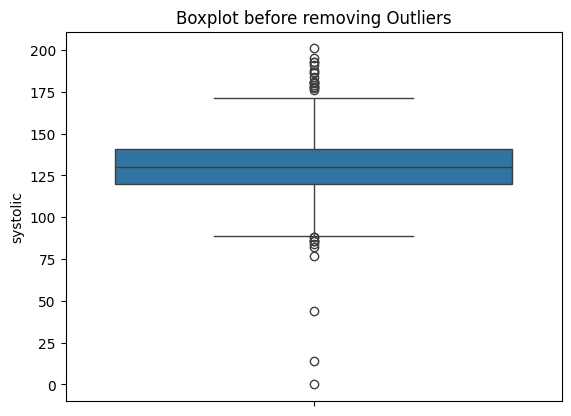

In [7]:
#Take an example by removing outliers in 'systolic' column:
sns.boxplot(df['systolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

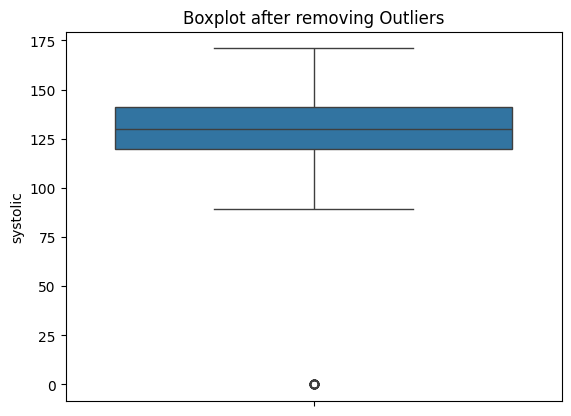

In [8]:
#Removing Outliers
for i in df['systolic']:
    q1 = df['systolic'].quantile(0.25)
    q3 = df['systolic'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['systolic'] = df['systolic'].replace(i,0)
        
sns.boxplot(df['systolic'])
plt.title('Boxplot after removing Outliers')
plt.show()

### 3.2 Histograms

<Axes: xlabel='weight_kg', ylabel='Density'>

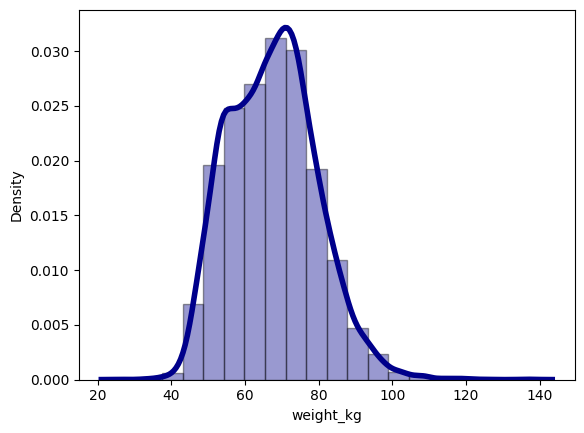

In [9]:
sns.distplot(df['weight_kg'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Normal Q-Q Plot

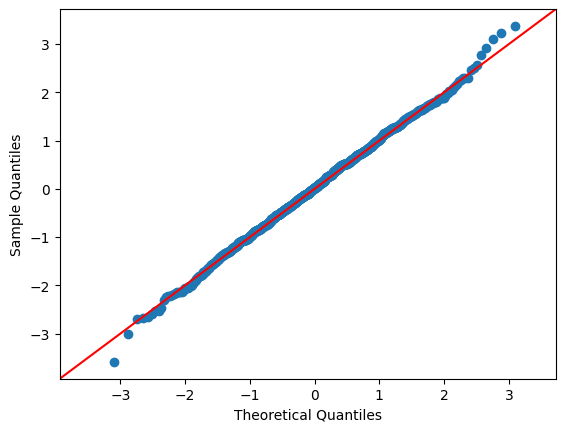

<Figure size 300x400 with 0 Axes>

In [10]:
#create Q-Q plot with 45-degree line added to plot for normal data
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.figure(figsize=(3,4))
plt.show()

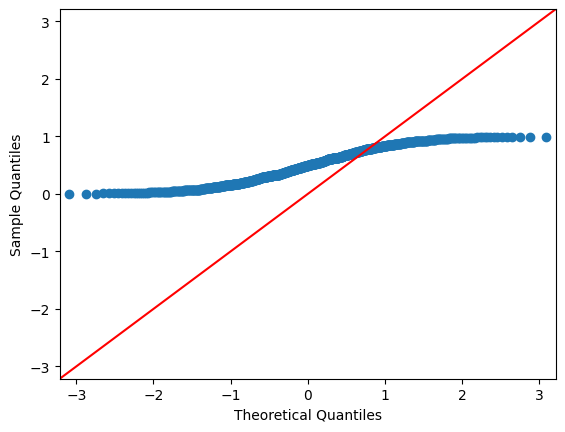

<Figure size 300x400 with 0 Axes>

In [11]:
#create Q-Q plot with 45-degree line added to plot for uniform distributed data
data = np.random.uniform(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.figure(figsize=(3,4))
plt.show()

### 3.4 Scatterplot

<Figure size 1500x2800 with 0 Axes>

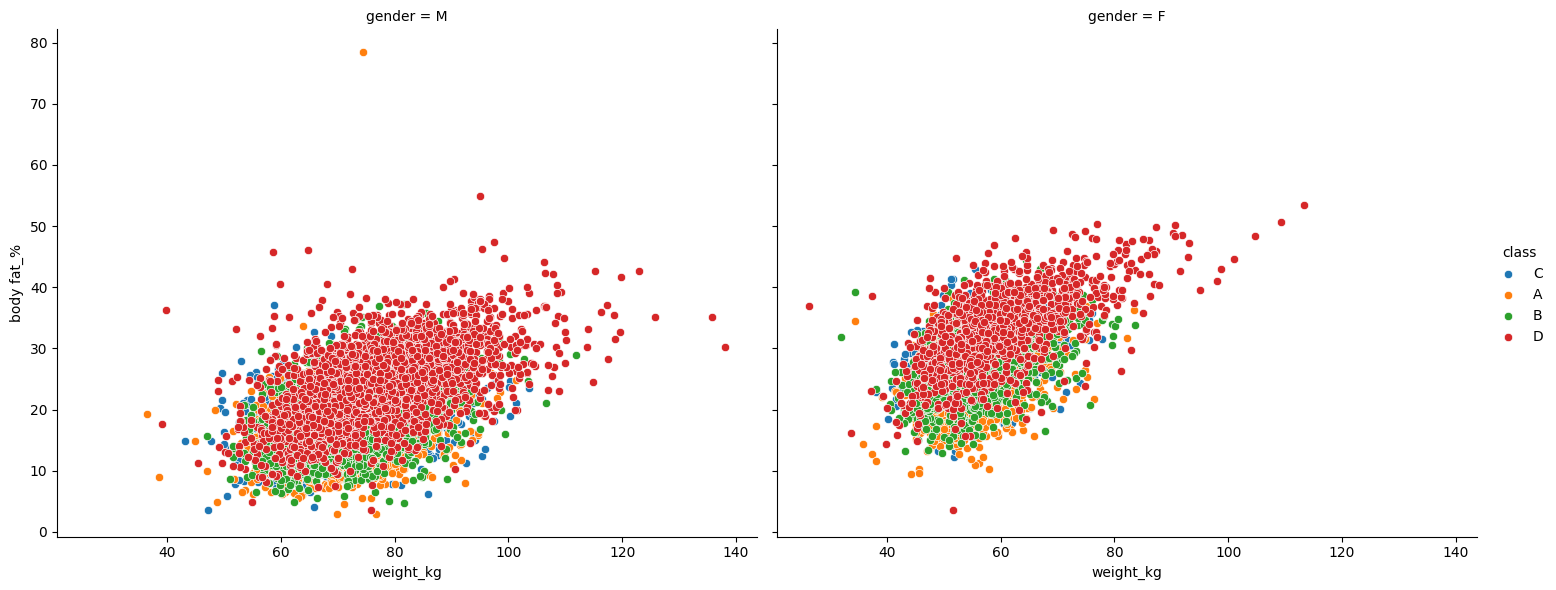

In [14]:
plt.figure(figsize = (15,28))
g = sns.FacetGrid(df, col="gender", hue="class",height=6, aspect=10/8)
g.map(sns.scatterplot, "weight_kg", "body fat_%")
g.add_legend()

### 3.5 Barchart

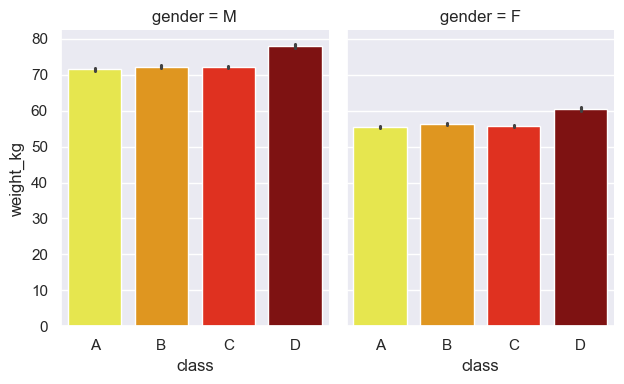

In [15]:
sns.set(rc = {'figure.figsize':(8,6)})
g = sns.FacetGrid(df, col="gender", height=4, aspect=0.8 )
g.map(sns.barplot, "class", "weight_kg",order=['A','B','C','D'],palette='hot_r' )

<Axes: xlabel='class', ylabel='count'>

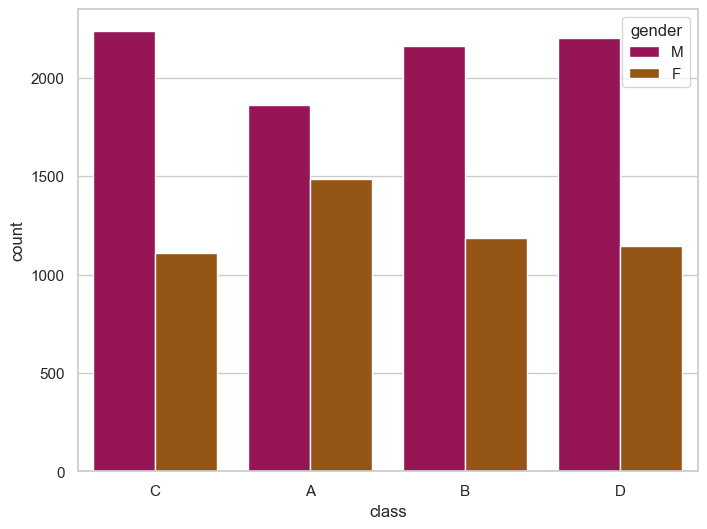

In [16]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.countplot(x='class',hue='gender',data=df,palette='brg')

<Axes: xlabel='class', ylabel='body fat_%'>

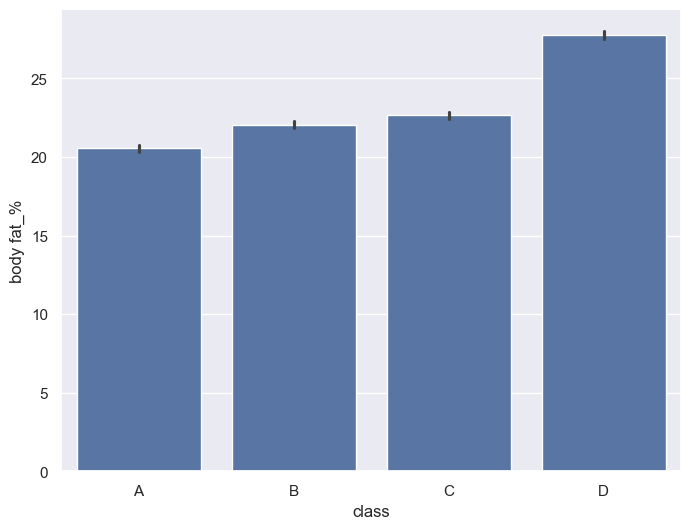

In [17]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(data = df, x='class',y='body fat_%',order=['A','B','C','D'])

### 3.6 Piechart

Text(0.5, 1.0, 'Situp counts by Class')

<Figure size 1500x600 with 0 Axes>

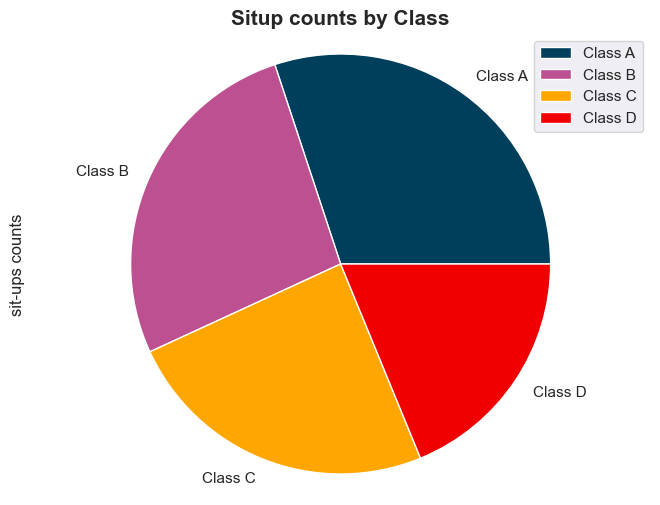

In [18]:
plt.figure(figsize=(15, 6))
labels=['Class A', 'Class B', 'Class C','Class D']
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts',labels=labels, colors=['#003f5c', '#bc5090', '#ffa600','#f00000'])
plt.axis('equal')
plt.title('Situp counts by Class', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Gender Ratio in Body Fat')

<Figure size 1500x600 with 0 Axes>

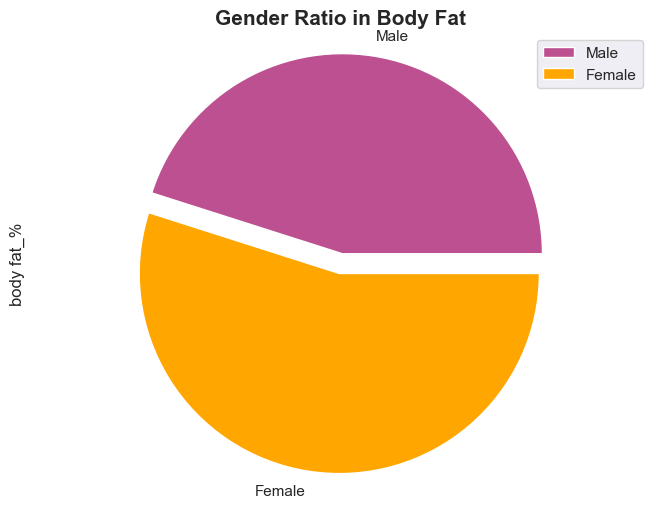

In [25]:
plt.figure(figsize=(15, 6))
labels=['Male','Female']
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%',labels=labels, colors=['#bc5090', '#ffa600'],explode=(0.0, 0.1))
plt.axis('equal')
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold')